## Agenda for today:

* setup homebrew (for mac), wsl (for windows)
* install python
* create python virtual environment (venv)
* send a message with webexteamsdk


There are too many choices in open source world and I wanted to share a starting point.



## MAC - installing homebrew

https://brew.sh/  
Homebrew is a package manager available on Mac.  

It's like an app store but with open source applications.  

Other alternatives: conda, macport

Once homebrew installed, you can install python via brew install command.


```
❯ brew install python@3.12
==> Auto-updating Homebrew...
Adjust how often this is run with HOMEBREW_AUTO_UPDATE_SECS or disable with
HOMEBREW_NO_AUTO_UPDATE. Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
clang-uml                     iowow                         libgit2@1.7                   tdb
==> New Casks
avbeam                                  jagex                                   sq-mixpad
duplicateaudiofinder                    roblox                                  twingate


...


==> python@3.12
Python has been installed as
  /opt/homebrew/bin/python3

Unversioned symlinks `python`, `python-config`, `pip` etc. pointing to
`python3`, `python3-config`, `pip3` etc., respectively, have been installed into
  /opt/homebrew/opt/python@3.12/libexec/bin

See: https://docs.brew.sh/Homebrew-and-Python


❯ which python3
/opt/homebrew/bin/python3

~ 
❯ ls -alF /opt/homebrew/bin/python3
lrwxr-xr-x  1 jaehkim  admin  40 18 Jul 11:32 /opt/homebrew/bin/python3@ -> ../Cellar/python@3.12/3.12.4/bin/python3

~ 
❯ 


```

## Windows - installing Linux via WSL

https://learn.microsoft.com/en-us/windows/wsl/install

WSL (version 2) is a small Hyper-V VM that integrates nicely with host Windows (sets up networking automatically, etc)

Default WSL install uses Ubuntu, I am using Debian.   
Windows Terminal is also highly recommended. Once you have WSL started, udpate and install python3:



```
/mnt/e
❯ sudo apt update
[sudo] password for obiwan:
Get:1 http://security.debian.org/debian-security trixie-security InRelease [43.5 kB]
Get:2 http://deb.debian.org/debian trixie InRelease [169 kB]

...

232 packages can be upgraded. Run 'apt list --upgradable' to see them.


/mnt/e took 19s
❯ sudo apt upgrade
Reading package lists... Done
    
...
  

❯ sudo apt install python3

...

  
/mnt/e
❯ ls -alF /usr/bin/python
lrwxrwxrwx 1 root root 24 Oct  8  2023 /usr/bin/python -> /etc/alternatives/python*

/mnt/e
❯ ls -alF /usr/bin/python3
lrwxrwxrwx 1 root root 10 Jul  9 21:01 /usr/bin/python3 -> python3.12*

/mnt/e
❯  

```

## Headless Linux

- Use CFME (https://cxlabs-syd-miq.cisco.com)
- Homelab (Mini PC or Raspberry Pi) + dynamic dns
- VPS (I'm paying 4 AUD per month!)
  
---
  
- Debian / Ubuntu (uses apt for its package manager)
- RHEL / Rocky / Alma (uses dnf for its package manager), don't recommend CentOS anymore
- RHEL subscription is available for free - developers.redhat.com

or choose a linux distribution from [this list](https://upload.wikimedia.org/wikipedia/commons/1/1b/Linux_Distribution_Timeline.svg)

## Python virtual environment

It is highly recommended to use python virtual environment for every projects:

* Python has a package manager called `pip` to manage python modules/packages
* Your OS has its own package manager (i.e. homebrew, dnf, apt...)
* OS components (i.e. dnf) may require certain python packages (dependencies)
* If you use pip to install a python package, your OS package manager will NOT be aware of it
* Similary, if you install a python package with your OS package manager, pip will NOT be aware of it
* `pip` may overwrite existing python packages, may break OS components that depend on these packages
* example) Farinaz's case 697630306 with Cryto/Cryptodome module
* `venv` is a standard python library to create and manage python virtual environment
* `pipenv` (used in devnet lab) is one of the alternatives


### Creating a python virtual environment
```
/mnt/e
❯ /usr/bin/python3 -m venv MyProject
The virtual environment was not created successfully because ensurepip is not
available.  On Debian/Ubuntu systems, you need to install the python3-venv
package using the following command.

    apt install python3.12-venv

You may need to use sudo with that command.  After installing the python3-venv
package, recreate your virtual environment.

Failing command: /mnt/e/MyProject/bin/python3


/mnt/e
```

Oops, we will need to install python3-venv:
    
```
❯ sudo apt install python3-venv -y
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done

...

/mnt/e
❯ /usr/bin/python3 -m venv MyProject


/mnt/e took 2m52s
❯

```


### Using python virtual envrionment

```
~ 
❯ source ./MyProject/bin/activate
```
This will update $PATH for python, python will be pointed to the venv location.

```
~ via 🐍 v3.12.4 (MyProject) 
❯ which python
/Users/jaehkim/MyProject/bin/python

~ via 🐍 v3.12.4 (MyProject) 
❯ which python3
/Users/jaehkim/MyProject/bin/python3

~ via 🐍 v3.12.4 (MyProject) 
❯ which pip
/Users/jaehkim/MyProject/bin/pip

~ via 🐍 v3.12.4 (MyProject) 
❯ which pip3
/Users/jaehkim/MyProject/bin/pip3

~ via 🐍 v3.12.4 (MyProject) 
❯ 
```

Note: I am using starship.rs for the shell prompt - other options include zsh + oh-my-zsh.  
nerdfont is recommended for nice emojis

## Installing python packages

```
~ via 🐍 v3.12.4 (MyProject) 
❯ cd MyProject 

~/MyProject via 🐍 v3.12.4 (MyProject) 
❯ pip install notebook 
```

this installs python package called Jupyter Notebook, which we will be using today!

installing webex teams python sdk:

```
~/MyProject via 🐍 v3.12.4 (MyProject) 
❯ pip install webexteamssdk
Collecting webexteamssdk
  Downloading webexteamssdk-1.7.tar.gz (73 kB)
```


Hundreds of python packages are listed on https://pypi.org/
- pandas (working with datasets), numpy (numbers & matrices), matplotlib (graphs), scikit-learn (machine learning), torch & tensorflow (machine learning + neural network), ollama (large language model - llama)

##### sadly, we stopped updating python sdk since 2022, it may have issues with python version > 3.10... github page mentions that webexteamssdk will be replaced by WebexPythonSDK, which cannot be found anywhere 🤷🏻‍♀️




## starting jupyter notebook

```
~/MyProject via 🐍 v3.12.4 (MyProject) 
❯ jupyter notebook
[I 2024-07-18 14:07:03.404 ServerApp] jupyter_lsp | extension was successfully linked.
[I 2024-07-18 14:07:03.406 ServerApp] jupyter_server_terminals | extension was successfully linked.
...
```

This will start a web browser session.  
note: If you are on WSL this may open text-based browser within WSL session). In this case, run `jupyter notebook --no-browser` and follow the link shown.

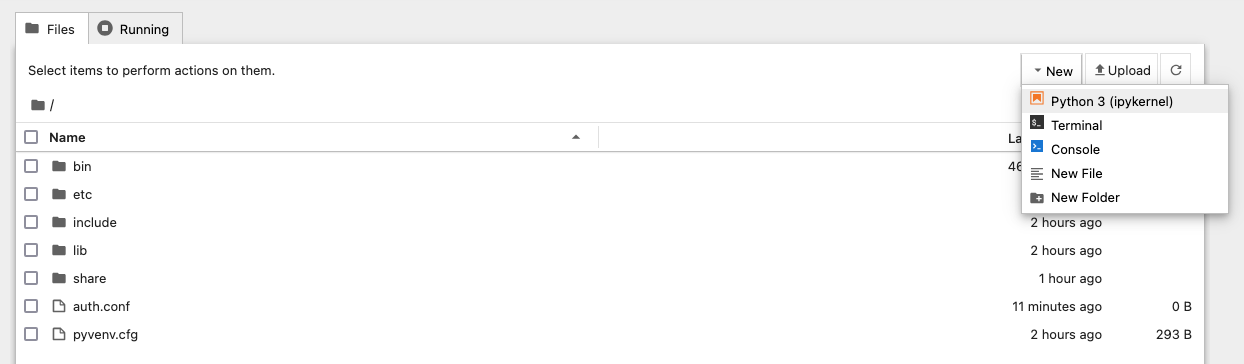

Create a new a Python3 notebook


## Python Basic - list and dictionary

In [1]:
# array but more convenient

my_list = ['hello', 'there', 'how', 'are', 'you']

print('first item:')
print(my_list[0])
print('\nfor loop made easy:')

for item in my_list:
    print(item)
    

my_string = '\n\nhello there, how are you?'
print('\n\nis string a list of character? ' + my_string[5])
for c in my_string:
    print(c)


first item:
hello

for loop made easy:
hello
there
how
are
you


is string a list of character? l




h
e
l
l
o
 
t
h
e
r
e
,
 
h
o
w
 
a
r
e
 
y
o
u
?


In [2]:
mycar = { 'colour': 'white',
       'brand': 'volvo',
        'year': '2020' }

print(mycar['brand'])


# looks familar?

volvo


In [3]:
# mixing list with dict

dict_w_list = { 'colour': 'white',
        'brand': 'volvo',
        'year': '2020',
        'list': my_list}


print(dict_w_list['list'][1])


there


## Creating a bot from developer.webex.com

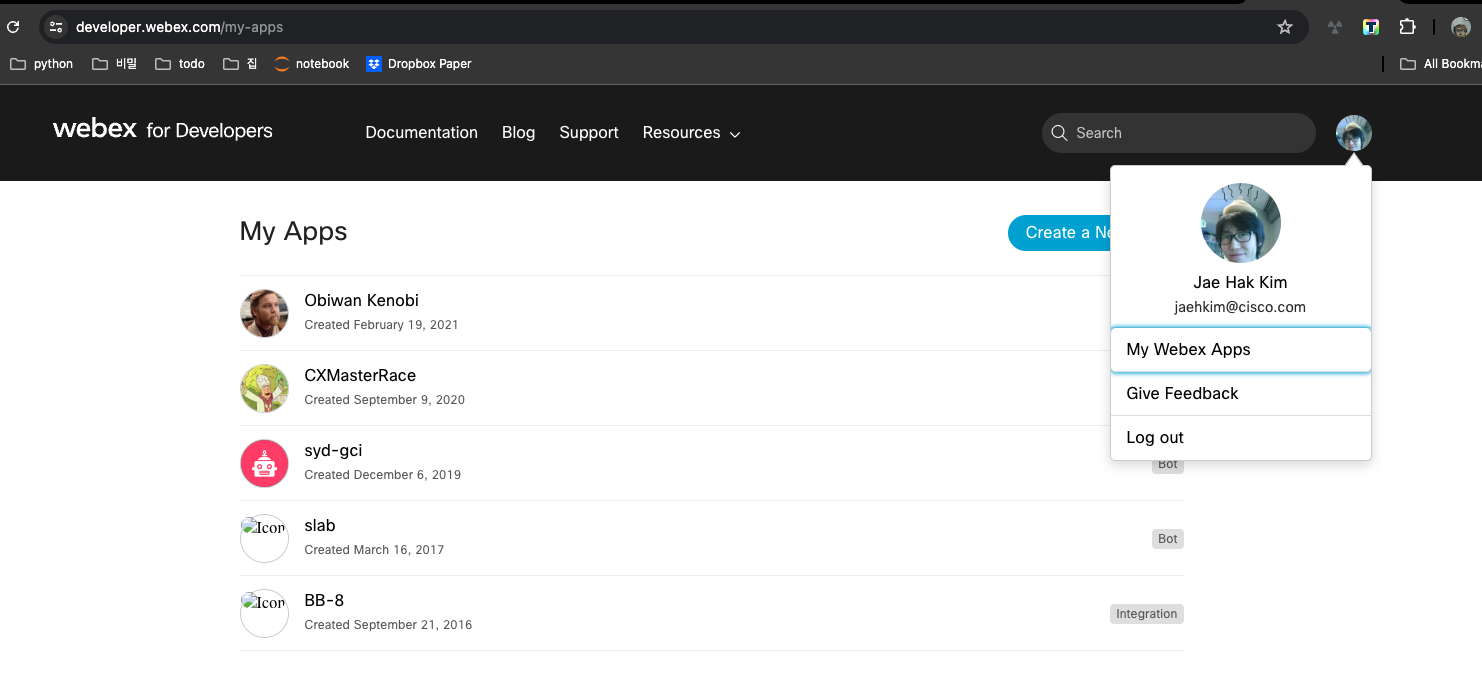


## Testing WebEx bot

In [4]:
from webexteamssdk import WebexTeamsAPI
from configparser import ConfigParser

parser = ConfigParser()
parser.read('/etc/auth.conf')

api = WebexTeamsAPI(access_token=parser.get('webex-obiwan', 'token'))

## ConfigParser

This is one way to store your tokens separately and keep it out of your script:

https://python-adv-web-apps.readthedocs.io/en/latest/configparser.html

Otherwise, the token will be visible as you need to store your token into a variable. e.g. `access_token='your token'`

```
[root@lowground ~]# cat /etc/auth.conf 
[bdb]
username = jaehkim
password = my_password


[webex-obiwan]
token = mytoken
```



In [5]:
from webexteamssdk import WebexTeamsAPI
from configparser import ConfigParser

parser = ConfigParser()
parser.read('/etc/auth.conf')

api = WebexTeamsAPI(access_token=parser.get('webex-obiwan', 'token'))

rooms = api.rooms.list()

for room in rooms:
    print(room.title)

scott
CXC-SYDNEY (TAC, SOURCED, BROADSOFT CALLING)
Jae Hak Kim
Team CXC-Sydney (TAC, Sourced, BroadSoft Calling)
Team Gruesomes


In [6]:
to_person = 'jaehkim@cisco.com'
msg = 'hello there!'
api.messages.create(toPersonEmail=to_person, markdown=msg)

Message('{"id": "Y2lzY29zcGFyazovL3VzL01FU1NBR0UvMzFmMTk5ZTAtNGVlMS0xMWVmLThhMmQtOWRlZjM5YWRhYzE1", "roomId": "Y2lzY29zcGFyazovL3VzL1JPT00vOTM2NzE4MWEtNWQzYi0zYjZkLWI4OWYtZDhlNTQzNmYwYzgy", "toPersonEmail": "jaehkim@cisco.com", "roomType": "direct", "text": "hello there!", "personId": "Y2lzY29zcGFyazovL3VzL1BFT1BMRS9lYjNkMDE4Mi00MmUxLTQ5NWQtYjA3ZS0xMWI1ZDNiNWQ1Yjk", "personEmail": "obiwankenobi@webex.bot", "markdown": "hello there!", "html": "<p>hello there!</p>", "created": "2024-07-31T02:04:18.430Z"}')

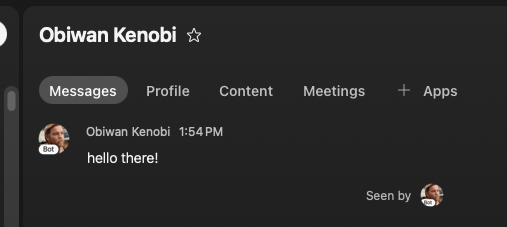

In [7]:
# the manual way - what webexteamssdk is actually doing

import requests

message_url = "https://webexapis.com/v1/messages/"

# HTTP header
request_header = {
    "Content-type": "application/json; charset=utf-8",
    "Authorization": "Bearer " + parser.get('webex-obiwan', 'token')
    }

request_payload = { "toPersonEmail": "jaehkim@cisco.com", "text": "hello there!" }

new_session = requests.Session()
response = new_session.post(message_url, headers=request_header, json=request_payload)
print(response.text)

{"id":"Y2lzY29zcGFyazovL3VzL01FU1NBR0UvMzI4NjExYjAtNGVlMS0xMWVmLTliNDctMGI0NDNjN2FkYWZk","roomId":"Y2lzY29zcGFyazovL3VzL1JPT00vOTM2NzE4MWEtNWQzYi0zYjZkLWI4OWYtZDhlNTQzNmYwYzgy","toPersonEmail":"jaehkim@cisco.com","roomType":"direct","text":"hello there!","personId":"Y2lzY29zcGFyazovL3VzL1BFT1BMRS9lYjNkMDE4Mi00MmUxLTQ5NWQtYjA3ZS0xMWI1ZDNiNWQ1Yjk","personEmail":"obiwankenobi@webex.bot","created":"2024-07-31T02:04:19.403Z"}


## Futher reading

https://webexteamssdk.readthedocs.io/en/latest/user/api.html#messages  
https://developer.webex.com/docs/api/v1/messages/list-messages


# The End